## Proyecto final - Analisis Proyecto Voces
### Gender Recognition by Voice 

### Proyecto realizado por:
### * Walter Pineda
### * Edwin Molina


In [ ]:
# Importando Bibliotecas de trabajo

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

In [ ]:
# Parte I - Importar dataset 

data_voces = pd.read_csv("/content/drive/MyDrive/PYTHON VERITAS/voces.csv", delimiter = ';')

NameError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Informacion de data set
Esta base de datos se creó para identificar una voz como masculina o femenina, basándose en las propiedades acústicas de la voz y el habla. El conjunto de datos consta de 3.168 muestras de voz grabadas, recogidas de hablantes masculinos y femeninos. 

Dicha base de datos surge como parte de la puesta en accion de un analisis para la creacion de un programa de reconocimiento de voz, el cual se ha recopilado de las siguientes fuentes: 

* The Harvard-Haskins Database of Regularly-Timed Speech - http://www.nsi.edu/~ani/download.html
* Telecommunications & Signal Processing Laboratory (TSP) Speech Database at McGill University - http://www-mmsp.ece.mcgill.ca/Documents../Data/index.html
* VoxForge Speech Corpus - http://www.repository.voxforge1.org/downloads/SpeechCorpus/Trunk/Audio/Main/8kHz_16bit/
* Festvox CMU_ARCTIC Speech Database at Carnegie Mellon University - http://festvox.org/cmu_arctic/

Fuente: Becker, K. (2016). Identifying the Gender of a Voice using Machine Learning. [online] Primary Objects. Available at: http://www.primaryobjects.com/2016/06/22/identifying-the-gender-of-a-voice-using-machine-learning/ [Accessed 21 Aug. 2021].

‌

In [ ]:
# Validacion de datos y formato
# Se realiza visualizacion de los primeros 5 datos

data_voces.head(5)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,genero
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,128.634.618.371.626,274.402.905.502.067,0.893369,0.491918,0,0.0597809849598081,0.084279106440321,0.0157016683022571,0.275862068965517,0.0078125,0.007812,0.0078125,0,0.000000,Masculino
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,224.232.853.628.204,634.613.854.542.068,0.892193,0.513724,0,0.066008740387572,0.107936553670454,0.0158259149357072,0.25,0.00901442307692308,0.007812,0.0546875,0.046875,0.052632,Masculino
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,307.571.545.800.584,1.024.927.704.721,0.846389,0.478905,0,0.0773155026958227,0.0987062615673936,0.0156555772994129,0.271186440677966,0.00799005681818182,0.007812,0.015625,0.0078125,0.046512,Masculino
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,123.283.127.554.372,417.729.621.025.317,0.963322,0.727232,0.0838781852082039,0.151228091724635,0.0889648485504597,0.017797552836485,0.25,0.201497395833333,0.007812,0.5625,0.5546875,0.247119,Masculino
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,110.117.366.551.545,43.337.131.547.091,0.971955,0.783568,0.1042614023145,0.135120387296677,0.106397844620363,0.0169312169312169,0.266666666666667,0.7128125,0.007812,5.484.375,54.765.625,0.208274,Masculino


In [ ]:
# Se realiza visualizacion de los ultimos 5 datos

data_voces.tail(5)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,genero
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,176.212.855.902.146,663.038.301.533.104,0.962934,0.763182,0.200836083608361,0.131883734383811,0.182789590594,0.0837696335078534,0.262295081967213,0.832899305555556,0.007812,42.109.375,4.203.125,0.161929,Femenino
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730265800808,250.395.446.908.969,0.960716,0.709570,0.0136829558998808,0.116220922114276,0.188979665912333,0.0344086021505376,0.275862068965517,0.909855769230769,0.039062,36.796.875,3.640.625,0.277897,Femenino
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,18.765.016.261.382,660.450.859.443.523,0.946854,0.654196,0.00800571837026448,0.142056255712406,0.209917676760527,0.0395061728395062,0.275862068965517,0.494270833333333,0.007812,29.375,29.296.875,0.194759,Femenino
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,159.106.489.452.459,538.829.754.263.834,0.950436,0.675470,0.212202097235462,0.143658744830027,0.172374995915133,0.0344827586206897,0.25,0.791360294117647,0.007812,359.375,35.859.375,0.311002,Femenino
3167,0.165509,0.092884,0.183044,0.070072,0.250827,0.180756,170.502.911.922.022,576.911.536.636.857,0.938829,0.601529,0.267701736465781,0.165508946001837,0.185606931233589,0.0622568093385214,0.271186440677966,0.227022058823529,0.007812,0.5546875,0.546875,0.350000,Femenino


In [ ]:
# Longitudes de la dimensión correspondiente del array 

data_voces.shape

(3168, 21)

El dataset nombrado como **"data_voces"** esta confirmado por 21 columnas con 3,168 filas de datos.

In [ ]:
# Verificacion de tipos de datos en dataset

data_voces.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew         object
kurt         object
sp.ent      float64
sfm         float64
mode         object
centroid     object
meanfun      object
minfun       object
maxfun       object
meandom      object
mindom      float64
maxdom       object
dfrange      object
modindx     float64
genero       object
dtype: object

Revisando el tipo de formato de cada variable se observa que actualmente el dataset se conforma por 2 tipos de datos, float64 y object. Se debe realizar una limpieza y transformacion de los datos debido a que todos los datos son de valor decimal sin embargo algunos datos tienen un formato por ejemplo "748.301.874.448.827" lo cual es sistema lo toma como object. 

Todos los datos deben tener el formato **float64**. 

### Limpieza de datos

Se deben limpiar y transformar las columnas [skew, kurt, mode, centroid, meanfun, minfun, maxfun, meandom, maxdom, dfrange]

In [ ]:
# Transformacion de datos a tipo float64 
# Se revisara primero que los datos de tipo object no contengan espacios vacios

data_voces['skew'].str.strip()
data_voces['kurt'].str.strip()
data_voces['mode'].str.strip()
data_voces['centroid'].str.strip()
data_voces['meanfun'].str.strip()
data_voces['maxfun'].str.strip()
data_voces['meandom'].str.strip()
data_voces['maxdom'].str.strip()
data_voces['dfrange'].str.strip()
data_voces['genero'].str.strip()

0       Masculino
1       Masculino
2       Masculino
3       Masculino
4       Masculino
          ...    
3163     Femenino
3164     Femenino
3165     Femenino
3166     Femenino
3167     Femenino
Name: genero, Length: 3168, dtype: object

In [ ]:
data_voces.isnull().sum()

meanfreq    0
sd          2
median      0
Q25         0
Q75         2
IQR         1
skew        0
kurt        0
sp.ent      1
sfm         0
mode        1
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      7
dfrange     1
modindx     0
genero      4
dtype: int64

* sd - 2 elementos nulos
* Q75 - 2 elementos nulos
* IQR - 1 elemento nulo
* sp.ent - 1 elemento nulo
* mode - 1 elemento nulo
* maxdom - 7 elementos nulos
* dfrange - 1 elemento nulo
* genero - 4 elementos nulos

Estos elementos una vez se limpie el dataset seran remplazados por los datos reales del dataset encontrados es: http://www.primaryobjects.com/2016/06/22/identifying-the-gender-of-a-voice-using-machine-learning/

### Transformacion de datos variable "skew"

In [ ]:
# Se realiza transformacion de datos de columna "skew" de objetc a float
# Esta variable contiene datos en formato "111.111.111.111" los cuales se les reemplazara el ',' por '' 

data_voces['skew']=data_voces['skew'].str.replace('.', '')

In [ ]:
# Verificacion de sustitucion de puntos por blak

data_voces.head(5)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,genero
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,128634618371626,274.402.905.502.067,0.893369,0.491918,0,0.0597809849598081,0.084279106440321,0.0157016683022571,0.275862068965517,0.0078125,0.007812,0.0078125,0,0.000000,Masculino
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,224232853628204,634.613.854.542.068,0.892193,0.513724,0,0.066008740387572,0.107936553670454,0.0158259149357072,0.25,0.00901442307692308,0.007812,0.0546875,0.046875,0.052632,Masculino
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,307571545800584,1.024.927.704.721,0.846389,0.478905,0,0.0773155026958227,0.0987062615673936,0.0156555772994129,0.271186440677966,0.00799005681818182,0.007812,0.015625,0.0078125,0.046512,Masculino
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,123283127554372,417.729.621.025.317,0.963322,0.727232,0.0838781852082039,0.151228091724635,0.0889648485504597,0.017797552836485,0.25,0.201497395833333,0.007812,0.5625,0.5546875,0.247119,Masculino
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,110117366551545,43.337.131.547.091,0.971955,0.783568,0.1042614023145,0.135120387296677,0.106397844620363,0.0169312169312169,0.266666666666667,0.7128125,0.007812,5.484.375,54.765.625,0.208274,Masculino


In [ ]:
# Se transforma la variable de object a float 

data_voces['skew']=data_voces['skew'].astype('float')

In [ ]:
# verficacion de cambio de variable 

data_voces['skew'].dtype

dtype('float64')

In [ ]:
# La columna 'skwe' ahora esta en formato float
data_voces.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,genero
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,1.286346e+14,274.402.905.502.067,0.893369,0.491918,0,0.0597809849598081,0.084279106440321,0.0157016683022571,0.275862068965517,0.0078125,0.007812,0.0078125,0,0.000000,Masculino
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,2.242329e+14,634.613.854.542.068,0.892193,0.513724,0,0.066008740387572,0.107936553670454,0.0158259149357072,0.25,0.00901442307692308,0.007812,0.0546875,0.046875,0.052632,Masculino
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,3.075715e+14,1.024.927.704.721,0.846389,0.478905,0,0.0773155026958227,0.0987062615673936,0.0156555772994129,0.271186440677966,0.00799005681818182,0.007812,0.015625,0.0078125,0.046512,Masculino
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831e+14,417.729.621.025.317,0.963322,0.727232,0.0838781852082039,0.151228091724635,0.0889648485504597,0.017797552836485,0.25,0.201497395833333,0.007812,0.5625,0.5546875,0.247119,Masculino
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174e+14,43.337.131.547.091,0.971955,0.783568,0.1042614023145,0.135120387296677,0.106397844620363,0.0169312169312169,0.266666666666667,0.7128125,0.007812,5.484.375,54.765.625,0.208274,Masculino


In [ ]:
# Para la columna 'skew' se deben transformar los datos de base 10**n por lo que se debe dividir entre la logitud de registro

data_voces['skew']= data_voces['skew'] / 10**13

In [ ]:
# Verificacion de datos, los datos son congruentes al dataset original del estudio
data_voces.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,genero
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402.905.502.067,0.893369,0.491918,0,0.0597809849598081,0.084279106440321,0.0157016683022571,0.275862068965517,0.0078125,0.007812,0.0078125,0,0.000000,Masculino
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613.854.542.068,0.892193,0.513724,0,0.066008740387572,0.107936553670454,0.0158259149357072,0.25,0.00901442307692308,0.007812,0.0546875,0.046875,0.052632,Masculino
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1.024.927.704.721,0.846389,0.478905,0,0.0773155026958227,0.0987062615673936,0.0156555772994129,0.271186440677966,0.00799005681818182,0.007812,0.015625,0.0078125,0.046512,Masculino
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,12.328313,417.729.621.025.317,0.963322,0.727232,0.0838781852082039,0.151228091724635,0.0889648485504597,0.017797552836485,0.25,0.201497395833333,0.007812,0.5625,0.5546875,0.247119,Masculino
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,11.011737,43.337.131.547.091,0.971955,0.783568,0.1042614023145,0.135120387296677,0.106397844620363,0.0169312169312169,0.266666666666667,0.7128125,0.007812,5.484.375,54.765.625,0.208274,Masculino


### Transformacion de datos variable "kurt"

In [ ]:
# Se realiza transformacion de datos de columna "kurt" de objetc a float
# Esta variable contiene datos en formato "123.456.789.111" los cuales se les reemplazara el ',' por '' 

data_voces['kurt']=data_voces['kurt'].str.replace('.', '')

In [ ]:
# Verificacion de sustitucion de puntos por blak

data_voces.head(5)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,genero
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274402905502067,0.893369,0.491918,0,0.0597809849598081,0.084279106440321,0.0157016683022571,0.275862068965517,0.0078125,0.007812,0.0078125,0,0.000000,Masculino
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634613854542068,0.892193,0.513724,0,0.066008740387572,0.107936553670454,0.0158259149357072,0.25,0.00901442307692308,0.007812,0.0546875,0.046875,0.052632,Masculino
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024927704721,0.846389,0.478905,0,0.0773155026958227,0.0987062615673936,0.0156555772994129,0.271186440677966,0.00799005681818182,0.007812,0.015625,0.0078125,0.046512,Masculino
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,12.328313,417729621025317,0.963322,0.727232,0.0838781852082039,0.151228091724635,0.0889648485504597,0.017797552836485,0.25,0.201497395833333,0.007812,0.5625,0.5546875,0.247119,Masculino
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,11.011737,43337131547091,0.971955,0.783568,0.1042614023145,0.135120387296677,0.106397844620363,0.0169312169312169,0.266666666666667,0.7128125,0.007812,5.484.375,54.765.625,0.208274,Masculino


In [ ]:
# Se transforma la variable de object a float 

data_voces['kurt']=data_voces['kurt'].astype('float')

In [ ]:
# verficacion de cambio de variable 

data_voces['kurt'].dtype

dtype('float64')

In [ ]:
# Para la columna 'skew' se deben transformar los datos de base 10**n por lo que se debe dividir entre la logitud de registro

data_voces['kurt']= data_voces['kurt'] / 10**12

In [ ]:
# Verificacion de datos, los datos son congruentes al dataset original del estudio
data_voces.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,genero
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0,0.0597809849598081,0.084279106440321,0.0157016683022571,0.275862068965517,0.0078125,0.007812,0.0078125,0,0.000000,Masculino
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0,0.066008740387572,0.107936553670454,0.0158259149357072,0.25,0.00901442307692308,0.007812,0.0546875,0.046875,0.052632,Masculino
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1.024928,0.846389,0.478905,0,0.0773155026958227,0.0987062615673936,0.0156555772994129,0.271186440677966,0.00799005681818182,0.007812,0.015625,0.0078125,0.046512,Masculino
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,12.328313,417.729621,0.963322,0.727232,0.0838781852082039,0.151228091724635,0.0889648485504597,0.017797552836485,0.25,0.201497395833333,0.007812,0.5625,0.5546875,0.247119,Masculino
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,11.011737,43.337132,0.971955,0.783568,0.1042614023145,0.135120387296677,0.106397844620363,0.0169312169312169,0.266666666666667,0.7128125,0.007812,5.484.375,54.765.625,0.208274,Masculino


### Transformacion de datos variable 'mode'

In [ ]:
# Los datos de la columna mode se encuentran en el formato correcto, solamente existen 1 registro nulo el cual se tendra que modificar

data_voces['mode']=data_voces['mode'].astype('float')

ValueError: ignored

In [ ]:
# Reemplazo de dato nulo dentro columna 'mode'

data_voces['mode']=data_voces['mode'].replace('dfgf', '0')

In [ ]:
# Se procede a cambiar la columna 'mode' de object a float

data_voces['mode']=data_voces['mode'].astype('float')

In [ ]:
# Verificacion de cambio de variable 

data_voces['mode'].dtype

dtype('float64')

In [ ]:
data_voces.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,genero
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.0597809849598081,0.084279106440321,0.0157016683022571,0.275862068965517,0.0078125,0.007812,0.0078125,0,0.000000,Masculino
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066008740387572,0.107936553670454,0.0158259149357072,0.25,0.00901442307692308,0.007812,0.0546875,0.046875,0.052632,Masculino
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1.024928,0.846389,0.478905,0.000000,0.0773155026958227,0.0987062615673936,0.0156555772994129,0.271186440677966,0.00799005681818182,0.007812,0.015625,0.0078125,0.046512,Masculino
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,12.328313,417.729621,0.963322,0.727232,0.083878,0.151228091724635,0.0889648485504597,0.017797552836485,0.25,0.201497395833333,0.007812,0.5625,0.5546875,0.247119,Masculino
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,11.011737,43.337132,0.971955,0.783568,0.104261,0.135120387296677,0.106397844620363,0.0169312169312169,0.266666666666667,0.7128125,0.007812,5.484.375,54.765.625,0.208274,Masculino


### Transformacion columna 'centroid' 

In [ ]:
# Los datos de la columna centroid se encuentran en el formato correcto, solamente existen registros nulo el cual se tendra que modificar

data_voces['centroid']=data_voces['centroid'].astype('float')

ValueError: ignored

In [ ]:
# Reemplazo de dato nulo dentro columna 'mode'

data_voces['centroid']=data_voces['centroid'].replace('fgf', '0')

In [ ]:
# Se procede a cambiar la columna 'mode' de object a float

data_voces['centroid']=data_voces['centroid'].astype('float')

In [ ]:
# Verificacion de cambio de variable

data_voces['centroid'].dtype

dtype('float64')

In [ ]:
# La columna centroid se encuentra ya transformada y limpia
data_voces.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,genero
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279106440321,0.0157016683022571,0.275862068965517,0.0078125,0.007812,0.0078125,0,0.000000,Masculino
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107936553670454,0.0158259149357072,0.25,0.00901442307692308,0.007812,0.0546875,0.046875,0.052632,Masculino
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1.024928,0.846389,0.478905,0.000000,0.077316,0.0987062615673936,0.0156555772994129,0.271186440677966,0.00799005681818182,0.007812,0.015625,0.0078125,0.046512,Masculino
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,12.328313,417.729621,0.963322,0.727232,0.083878,0.151228,0.0889648485504597,0.017797552836485,0.25,0.201497395833333,0.007812,0.5625,0.5546875,0.247119,Masculino
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,11.011737,43.337132,0.971955,0.783568,0.104261,0.135120,0.106397844620363,0.0169312169312169,0.266666666666667,0.7128125,0.007812,5.484.375,54.765.625,0.208274,Masculino


### Transformacion columna 'meanfun'

In [ ]:
# Los datos de la columna meanfun se encuentran en el formato correcto, solamente existen registros nulo el cual se tendra que modificar

data_voces['meanfun']=data_voces['meanfun'].astype('float')

ValueError: ignored

In [ ]:
# Reemplazar dato nulo en columna 'meanfun'

data_voces['meanfun']=data_voces['meanfun'].replace('dfdf', '0')

In [ ]:
# Cambio de variable object a float
data_voces['meanfun']=data_voces['meanfun'].astype('float')

In [ ]:
# Verificacion de cambio de variable
data_voces['meanfun'].dtype

dtype('float64')

In [ ]:
# La columna meanfun se encuentra ya transformada y limpia
data_voces.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,genero
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.0157016683022571,0.275862068965517,0.0078125,0.007812,0.0078125,0,0.000000,Masculino
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.0158259149357072,0.25,0.00901442307692308,0.007812,0.0546875,0.046875,0.052632,Masculino
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1.024928,0.846389,0.478905,0.000000,0.077316,0.098706,0.0156555772994129,0.271186440677966,0.00799005681818182,0.007812,0.015625,0.0078125,0.046512,Masculino
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,12.328313,417.729621,0.963322,0.727232,0.083878,0.151228,0.088965,0.017797552836485,0.25,0.201497395833333,0.007812,0.5625,0.5546875,0.247119,Masculino
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,11.011737,43.337132,0.971955,0.783568,0.104261,0.135120,0.106398,0.0169312169312169,0.266666666666667,0.7128125,0.007812,5.484.375,54.765.625,0.208274,Masculino


### Transformacion variable 'minfun'

In [ ]:
# Los datos de la columna minfun se encuentran en el formato correcto, solamente existen registros nulo el cual se tendra que modificar

data_voces['minfun']=data_voces['minfun'].astype('float')

ValueError: ignored

In [ ]:
data_voces['minfun']=data_voces['minfun'].replace('dfdd','0')

In [ ]:
data_voces['minfun']=data_voces['minfun'].astype('float')

ValueError: ignored

In [ ]:
data_voces['minfun']=data_voces['minfun'].replace('dfdf','0')

In [ ]:
data_voces['minfun']=data_voces['minfun'].astype('float')

ValueError: ignored

In [ ]:
data_voces['minfun']=data_voces['minfun'].replace('gh','0')

In [ ]:
data_voces['minfun']=data_voces['minfun'].astype('float')

ValueError: ignored

In [ ]:
data_voces['minfun']=data_voces['minfun'].replace('hj','0')

In [ ]:
data_voces['minfun']=data_voces['minfun'].astype('float')

ValueError: ignored

In [ ]:
data_voces['minfun']=data_voces['minfun'].replace('j','0')

In [ ]:
data_voces['minfun']=data_voces['minfun'].astype('float')

ValueError: ignored

In [ ]:
data_voces['minfun']=data_voces['minfun'].replace('jk','0')

In [ ]:
data_voces['minfun']=data_voces['minfun'].astype('float')

ValueError: ignored

In [ ]:
data_voces['minfun']=data_voces['minfun'].replace('jlk','0')

In [ ]:
data_voces['minfun']=data_voces['minfun'].astype('float')

ValueError: ignored

In [ ]:
data_voces['minfun']=data_voces['minfun'].replace('df','0')

In [ ]:
# Los datos nulos ya fueron reemplazados y se puede transformar la variable a float
data_voces['minfun']=data_voces['minfun'].astype('float')

In [ ]:
# Verificacion de cambio de variable 
data_voces['minfun'].dtype

dtype('float64')

In [ ]:
# La columna minnfun se encuentra ya transformada y limpia
data_voces.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,genero
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862068965517,0.0078125,0.007812,0.0078125,0,0.000000,Masculino
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.25,0.00901442307692308,0.007812,0.0546875,0.046875,0.052632,Masculino
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1.024928,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186440677966,0.00799005681818182,0.007812,0.015625,0.0078125,0.046512,Masculino
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,12.328313,417.729621,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.25,0.201497395833333,0.007812,0.5625,0.5546875,0.247119,Masculino
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,11.011737,43.337132,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266666666666667,0.7128125,0.007812,5.484.375,54.765.625,0.208274,Masculino


### Limpieza columna 'maxfun'

In [ ]:
# Los datos de la columna maxfun se encuentran en el formato correcto, solamente existen registros nulo el cual se tendra que modificar

data_voces['maxfun']=data_voces['maxfun'].astype('float')

ValueError: ignored

In [ ]:
# Se procede a reemplazar los datos nulos 
data_voces['maxfun']=data_voces['maxfun'].replace('dfd','0')

In [ ]:
data_voces['maxfun']=data_voces['maxfun'].astype('float')

In [ ]:
# Verificacion de cambio de variable
data_voces['maxfun'].dtype

dtype('float64')

In [ ]:
# La columna maxnfun se encuentra ya transformada y limpia
data_voces.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,genero
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.0078125,0.007812,0.0078125,0,0.000000,Masculino
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.00901442307692308,0.007812,0.0546875,0.046875,0.052632,Masculino
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1.024928,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.00799005681818182,0.007812,0.015625,0.0078125,0.046512,Masculino
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,12.328313,417.729621,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497395833333,0.007812,0.5625,0.5546875,0.247119,Masculino
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,11.011737,43.337132,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.7128125,0.007812,5.484.375,54.765.625,0.208274,Masculino


### Transformacion columna 'meandom'

In [ ]:
data_voces['meandom'].dtype

dtype('O')

In [ ]:
data_voces['meandom'].str.strip()

0                 0.0078125
1       0.00901442307692308
2       0.00799005681818182
3         0.201497395833333
4                 0.7128125
               ...         
3163      0.832899305555556
3164      0.909855769230769
3165      0.494270833333333
3166      0.791360294117647
3167      0.227022058823529
Name: meandom, Length: 3168, dtype: object

In [ ]:
# Los datos de la columna meandom se encuentran en el formato correcto, solamente existen registros nulo el cual se tendra que modificar

data_voces['meandom']=data_voces['meandom'].str.replace('.', '')

In [ ]:
data_voces.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,genero
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,00078125,0.007812,0.0078125,0,0.000000,Masculino
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,000901442307692308,0.007812,0.0546875,0.046875,0.052632,Masculino
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1.024928,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,000799005681818182,0.007812,0.015625,0.0078125,0.046512,Masculino
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,12.328313,417.729621,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0201497395833333,0.007812,0.5625,0.5546875,0.247119,Masculino
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,11.011737,43.337132,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,07128125,0.007812,5.484.375,54.765.625,0.208274,Masculino


In [ ]:
# Trasformacion de variable a float
data_voces['meandom']=data_voces['meandom'].astype('float')

In [ ]:
# Verificacion de cambio de variable

data_voces['meandom'].dtype

dtype('float64')

### Transformacion columna 'maxdom'

In [ ]:
data_voces['maxdom'].dtype

dtype('O')

In [ ]:
data_voces['maxdom'].str.strip()

0        0.0078125
1        0.0546875
2         0.015625
3           0.5625
4        5.484.375
           ...    
3163    42.109.375
3164    36.796.875
3165        29.375
3166       359.375
3167     0.5546875
Name: maxdom, Length: 3168, dtype: object

In [ ]:
# Los datos de la columna meandom se encuentran en el formato correcto, solamente existen registros nulo el cual se tendra que modificar

data_voces['maxdom']=data_voces['maxdom'].str.replace('.', '')

In [ ]:
data_voces.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,genero
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,7.812500e+04,0.007812,00078125,0,0.000000,Masculino
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,9.014423e+14,0.007812,00546875,0.046875,0.052632,Masculino
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1.024928,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,7.990057e+14,0.007812,0015625,0.0078125,0.046512,Masculino
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,12.328313,417.729621,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,2.014974e+14,0.007812,05625,0.5546875,0.247119,Masculino
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,11.011737,43.337132,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,7.128125e+06,0.007812,5484375,54.765.625,0.208274,Masculino


In [ ]:
# Transformacion de variable a float

data_voces['maxdom']=data_voces['maxdom'].astype('float')

In [ ]:
data_voces.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,genero
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,7.812500e+04,0.007812,78125.0,0,0.000000,Masculino
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,9.014423e+14,0.007812,546875.0,0.046875,0.052632,Masculino
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1.024928,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,7.990057e+14,0.007812,15625.0,0.0078125,0.046512,Masculino
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,12.328313,417.729621,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,2.014974e+14,0.007812,5625.0,0.5546875,0.247119,Masculino
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,11.011737,43.337132,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,7.128125e+06,0.007812,5484375.0,54.765.625,0.208274,Masculino


In [ ]:
data_voces['maxdom']= data_voces['maxdom'] / 10000000

In [ ]:
data_voces.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,genero
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,7.812500e+04,0.007812,0.007812,0,0.000000,Masculino
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,9.014423e+14,0.007812,0.054688,0.046875,0.052632,Masculino
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1.024928,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,7.990057e+14,0.007812,0.001563,0.0078125,0.046512,Masculino
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,12.328313,417.729621,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,2.014974e+14,0.007812,0.000562,0.5546875,0.247119,Masculino
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,11.011737,43.337132,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,7.128125e+06,0.007812,0.548438,54.765.625,0.208274,Masculino


### Transformacion columna 'dfrange'

In [ ]:
data_voces['dfrange'].dtype

dtype('O')

In [ ]:
data_voces['dfrange'].str.strip()

0                0
1         0.046875
2        0.0078125
3        0.5546875
4       54.765.625
           ...    
3163     4.203.125
3164     3.640.625
3165    29.296.875
3166    35.859.375
3167      0.546875
Name: dfrange, Length: 3168, dtype: object

In [ ]:
# Los datos de la columna dfrange se encuentran en el formato correcto, solamente existen registros nulo el cual se tendra que modificar

data_voces['dfrange']=data_voces['dfrange'].str.replace('.', '')

In [ ]:
data_voces.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,genero
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,7.812500e+04,0.007812,0.007812,0,0.000000,Masculino
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,9.014423e+14,0.007812,0.054688,0046875,0.052632,Masculino
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1.024928,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,7.990057e+14,0.007812,0.001563,00078125,0.046512,Masculino
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,12.328313,417.729621,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,2.014974e+14,0.007812,0.000562,05546875,0.247119,Masculino
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,11.011737,43.337132,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,7.128125e+06,0.007812,0.548438,54765625,0.208274,Masculino


In [ ]:
data_voces['dfrange']=data_voces['dfrange'].astype('float')

In [ ]:
data_voces.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,genero
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,7.812500e+04,0.007812,0.007812,0.0,0.000000,Masculino
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,9.014423e+14,0.007812,0.054688,46875.0,0.052632,Masculino
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1.024928,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,7.990057e+14,0.007812,0.001563,78125.0,0.046512,Masculino
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,12.328313,417.729621,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,2.014974e+14,0.007812,0.000562,5546875.0,0.247119,Masculino
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,11.011737,43.337132,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,7.128125e+06,0.007812,0.548438,54765625.0,0.208274,Masculino


In [ ]:
data_voces['dfrange']= data_voces['dfrange'] / 10000000

In [ ]:
data_voces.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,genero
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,7.812500e+04,0.007812,0.007812,0.000000,0.000000,Masculino
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,9.014423e+14,0.007812,0.054688,0.004687,0.052632,Masculino
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1.024928,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,7.990057e+14,0.007812,0.001563,0.007812,0.046512,Masculino
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,12.328313,417.729621,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,2.014974e+14,0.007812,0.000562,0.554688,0.247119,Masculino
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,11.011737,43.337132,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,7.128125e+06,0.007812,0.548438,5.476562,0.208274,Masculino


In [ ]:
# Verificacion de variables transformadas a float

data_voces.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
genero       object
dtype: object

In [ ]:
# Verificacion de datos nulos con variables transformadas

data_voces.isnull().sum()

meanfreq    0
sd          2
median      0
Q25         0
Q75         2
IQR         1
skew        0
kurt        0
sp.ent      1
sfm         0
mode        1
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      7
dfrange     1
modindx     0
genero      4
dtype: int64

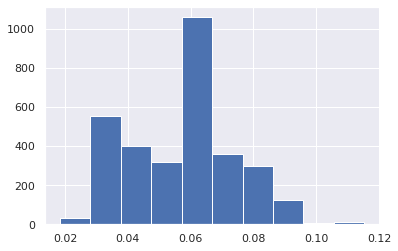

In [ ]:
# Imputacion para reemplazo de valores nulos de columna 'sd'

data_voces['sd'].hist();

Se observa que el histograma tiene una distribucion normal, por lo que se procede a imputar los datos nulos con la media.

In [ ]:
sd_mean = data_voces['sd'].mean()

In [ ]:
sd_mean

0.05711544219798741

In [ ]:
data_voces['sd'].fillna(sd_mean, inplace=True)

In [ ]:
data_voces['sd'].isnull().sum()

0

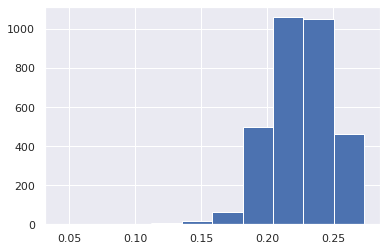

In [ ]:
# Imputacion para reemplazo de valores nulos de columna 'Q75'

data_voces['Q75'].hist();

El histograma muestra un sesgo a la derecha y no tiene una forma normal por lo que se procede a imputar por la mediana

In [ ]:
Q75_median = data_voces['Q75'].mean()

In [ ]:
Q75_median

0.2247860179509705

In [ ]:
data_voces['Q75'].fillna(Q75_median, inplace=True)

In [ ]:
data_voces['Q75'].isnull().sum()

0

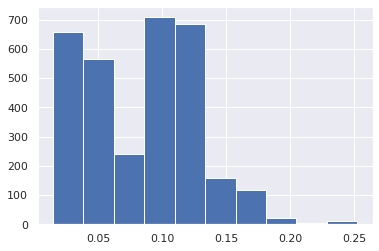

In [ ]:
# Imputacion para reemplazo de valores nulos de columna 'IQR'

data_voces['IQR'].hist();

El histograma muestra un sesgo hacia la izquierda con una forma multimodal por lo que se imputara por la mediana.

In [ ]:
IQR_median = data_voces['IQR'].median()

In [ ]:
IQR_median

0.0942741935483871

In [ ]:
data_voces['IQR'].fillna(IQR_median, inplace=True)

In [ ]:
data_voces['IQR'].isnull().sum()

0

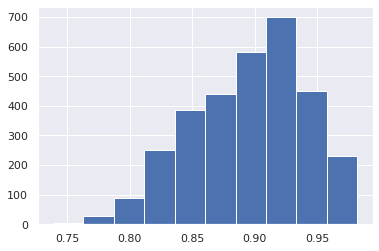

In [ ]:
# Imputacion para reemplazo de valores nulos de columna 'sp.ent'

data_voces['sp.ent'].hist();

El histograma muestra una distribucion normal con un sesgo hacia la derecha, por lo que se imputaran los datos nulos por la media. 

In [ ]:
spent_mean = data_voces['sp.ent'].mean()

In [ ]:
spent_mean

0.8951051466600114

In [ ]:
data_voces['sp.ent'].fillna(spent_mean, inplace=True)

In [ ]:
data_voces['sp.ent'].isnull().sum()

0

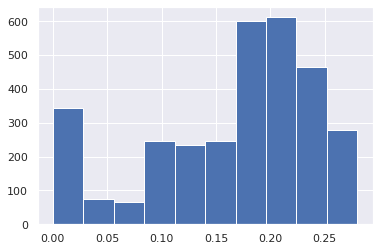

In [ ]:
# Imputacion para reemplazo de valores nulos de columna 'mode'

data_voces['mode'].hist();

El histograma muestra un sesgo hacia la izquierda con una forma multimodal por lo que se imputara por la mediana.

In [ ]:
mode_median = data_voces['mode'].median()

In [ ]:
mode_median

0.186530612244898

In [ ]:
data_voces['mode'].fillna(mode_median, inplace=True)

In [ ]:
data_voces['mode'].isnull().sum()

0

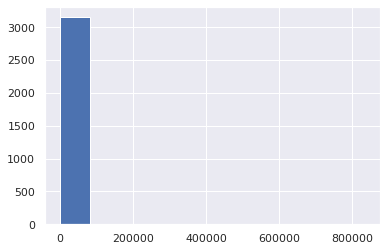

In [ ]:
# Imputacion para reemplazo de valores nulos de columna 'maxdom'

data_voces['maxdom'].hist();

Como podemos ver el histograma tiene los datos acumulados en la izquierda, y no tiene una forma normal, por ende vamos a imputar por la mediana

In [ ]:
maxdom_median = data_voces['maxdom'].median()

In [ ]:
maxdom_median

0.8296875

In [ ]:
data_voces['maxdom'].fillna(maxdom_median, inplace=True)

In [ ]:
data_voces['maxdom'].isnull().sum()

0

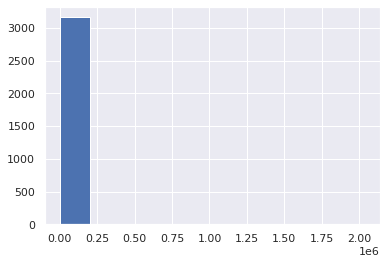

In [ ]:
# Imputacion para reemplazo de valores nulos de columna 'dfrange'

data_voces['dfrange'].hist();

Como podemos ver el histograma tiene los datos acumulados en la izquierda, y no tiene una forma normal, por ende vamos a imputar por la mediana

In [ ]:
dfrange_median = data_voces['dfrange'].median()

In [ ]:
dfrange_median

0.8984375

In [ ]:
data_voces['dfrange'].fillna(dfrange_median, inplace=True)

In [ ]:
data_voces['dfrange'].isnull().sum()

0

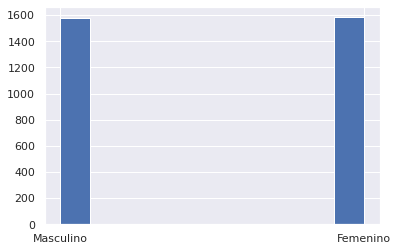

In [ ]:
# Imputacion para reemplazo de valores nulos de columna 'genero'

data_voces['genero'].hist();

El histograma muestra que los valores de genero Masuculino y Femenino son muy cercanos, observando el dataset se identifico que faltan valores dentro del segmento de Masculinos, y el estudio al ser un 50% por hombres y 50% por mujeres se procede a imputar por el genero Masculino para terminar el segmento.

In [ ]:
data_voces.groupby('genero').size()

genero
Femenino     1584
Masculino    1580
dtype: int64

In [ ]:
data_voces['genero'].fillna('Masculino', inplace=True)

In [ ]:
data_voces['genero'].isnull().sum()

0

In [ ]:
# Verificacion de datos nulos en el dataset

data_voces.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
genero      0
dtype: int64

# Inicio de Inciso D
#Utilización de describe() para analisis de datos

Los datos estadisticos se evaluaran con la función describe, tomando en cuenta el promedio, desviación estandar, dato minimo y dato máximo. Recordar que estos son datos totales de las columnas, en este punto aun no se analizan las diferencias mas importantes que nos serviran para establecer la metodología entre mujeres y hombres (genero). Lo anterior se trabajará por medio de tablas pivote.

In [ ]:
# Inicio de Inciso D
#Utilización de describe() para analisis de datos

data_voces['centroid'].describe()

count    3168.000000
mean        0.180867
std         0.030074
min         0.000000
25%         0.163662
50%         0.184838
75%         0.199146
max         0.251124
Name: centroid, dtype: float64

In [ ]:
data_voces['dfrange'].describe()

count    3.168000e+03
mean     1.838595e+03
std      4.727477e+04
min      0.000000e+00
25%      7.031250e-02
50%      8.984375e-01
75%      6.445312e+00
max      2.034888e+06
Name: dfrange, dtype: float64

In [ ]:
data_voces['sd'].describe()

count    3168.000000
mean        0.057115
std         0.016647
min         0.018363
25%         0.041954
50%         0.059130
75%         0.066985
max         0.115273
Name: sd, dtype: float64

In [ ]:
data_voces['meanfreq'].describe()

count    3168.000000
mean        0.180907
std         0.029918
min         0.039363
25%         0.163662
50%         0.184838
75%         0.199146
max         0.251124
Name: meanfreq, dtype: float64

In [ ]:
data_voces['median'].describe()

count    3168.000000
mean        0.185621
std         0.036360
min         0.010975
25%         0.169593
50%         0.190032
75%         0.210618
max         0.261224
Name: median, dtype: float64

In [ ]:
data_voces['Q25'].describe()

count    3168.000000
mean        0.140456
std         0.048680
min         0.000229
25%         0.111087
50%         0.140286
75%         0.175939
max         0.247347
Name: Q25, dtype: float64

In [ ]:
data_voces['Q75'].describe()

count    3168.000000
mean        0.224786
std         0.023624
min         0.042946
25%         0.208765
50%         0.225684
75%         0.243660
max         0.273469
Name: Q75, dtype: float64

In [ ]:
data_voces['IQR'].describe()

count    3168.000000
mean        0.084301
std         0.042779
min         0.014558
25%         0.042560
50%         0.094274
75%         0.114166
max         0.252225
Name: IQR, dtype: float64

In [ ]:
data_voces['skew'].describe()

count    3168.000000
mean       23.576592
std        16.268024
min         0.011785
25%        15.009390
50%        21.030875
75%        28.174675
max        99.749535
Name: skew, dtype: float64

In [ ]:
data_voces['kurt'].describe()

count    3168.000000
mean      427.255178
std       285.275190
min         0.159098
25%       142.600915
50%       428.196929
75%       662.469881
max       999.334369
Name: kurt, dtype: float64

In [ ]:
data_voces['sp.ent'].describe()

count    3168.000000
mean        0.895105
std         0.044963
min         0.738651
25%         0.861811
50%         0.901724
75%         0.928650
max         0.981997
Name: sp.ent, dtype: float64

In [ ]:
data_voces['sfm'].describe()

count    3168.000000
mean        0.408216
std         0.177521
min         0.036876
25%         0.258041
50%         0.396335
75%         0.533676
max         0.842936
Name: sfm, dtype: float64

In [ ]:
data_voces['mode'].describe()

count    3168.000000
mean        0.165263
std         0.077207
min         0.000000
25%         0.118016
50%         0.186531
75%         0.221058
max         0.280000
Name: mode, dtype: float64

In [ ]:
data_voces['meanfun'].describe()

count    3168.000000
mean        0.142770
std         0.032401
min         0.000000
25%         0.116998
50%         0.140519
75%         0.169581
max         0.237636
Name: meanfun, dtype: float64

In [ ]:
data_voces['minfun'].describe()

count    3168.000000
mean        0.036741
std         0.019308
min         0.000000
25%         0.018161
50%         0.046110
75%         0.047904
max         0.204082
Name: minfun, dtype: float64

In [ ]:
data_voces['maxfun'].describe()

count    3168.000000
mean        0.258471
std         0.031758
min         0.000000
25%         0.253634
50%         0.271186
75%         0.277457
max         0.279114
Name: maxfun, dtype: float64

In [ ]:
data_voces['meandom'].describe()

count    3.168000e+03
mean     2.878434e+14
std      2.998896e+14
min      5.000000e+00
25%      1.887939e+11
50%      1.596544e+14
75%      5.035364e+14
max      9.994612e+14
Name: meandom, dtype: float64

In [ ]:
data_voces['mindom'].describe()

count    3168.000000
mean        0.052647
std         0.063299
min         0.004883
25%         0.007812
50%         0.023438
75%         0.070312
max         0.458984
Name: mindom, dtype: float64

In [ ]:
data_voces['maxdom'].describe()

count    3.168000e+03
mean     1.467499e+03
std      3.175060e+04
min      1.000000e-07
25%      7.781250e-02
50%      8.296875e-01
75%      6.210938e+00
max      8.333350e+05
Name: maxdom, dtype: float64

In [ ]:
data_voces['modindx'].describe()

count    3168.000000
mean        0.173752
std         0.119454
min         0.000000
25%         0.099766
50%         0.139357
75%         0.209183
max         0.932374
Name: modindx, dtype: float64

In [ ]:
data_voces['genero'].describe()

count          3168
unique            2
top       Masculino
freq           1584
Name: genero, dtype: object

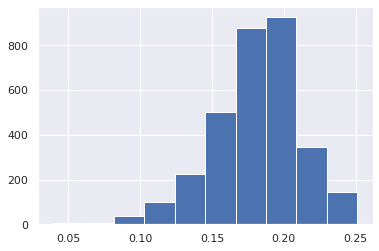

In [ ]:
#Para la realización de histogramas se analizan los datos mas sobresalientes y que posteriormente se utilizaran para el analisis

data_voces['meanfreq'].hist();

El promedio de frecuencias muestra una distribución normal bastante visible. Los datos que mas se repiten estan entre 0.17 y 0.20 khz, con un aproximado de 1750 datos en este rango. Esta es de las referencias mas básicas y primarias para el posterior análisis de la aplicación. 

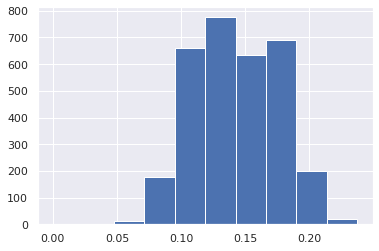

In [ ]:
data_voces['meanfun'].hist();

El meanfun se convierte en una variable importante ha considerarse y un dato importante para la toma de decisiones del programa. Se puede observar una distribución normal manteniendo la mayoría de datos entre los rangos de 0.10 a 0.18 KHZ aproximadamente.

---



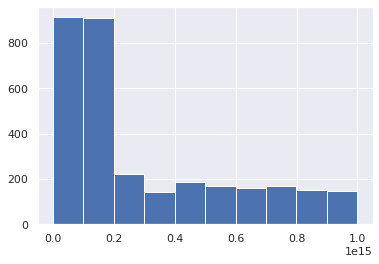

In [ ]:
data_voces['meandom'].hist();

La variable mandom tiene un comportamiento totalmente diferente a las anteriores mostrando una distribución asimetrica positiva, teniendo una fuerte cantidad de datos entre 0 y 0.2, luego se estabiliza desde 0.21 a 1.

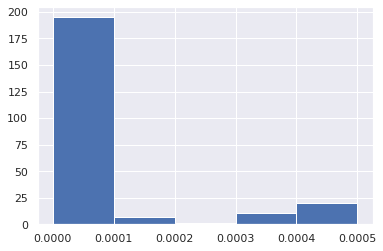

In [ ]:
plt.hist(data_voces['dfrange'], bins=[0,0.0001,0.0002,0.0003,0.0004,0.0005]);

La variable dfrange tiene datos bastante pequeños, el histograma mostrado se agrando para poder ver de mejor manera la ubicación de los datos. Estos en su mayoría se encuentran entre 0 y 0.0001 con algunos datos outliers que se observan.

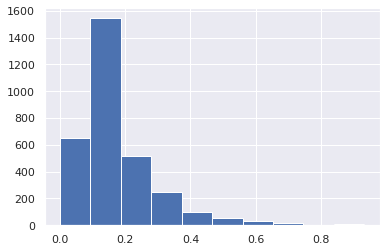

In [ ]:
data_voces['modindx'].hist();

A primera vista la variable modindx (indice de modulación) parece ser bastante importante por su definición y teoría dentro de la identificación de voces. Esto se definira posteriormente en el análisis de relación de datos. Por el momento encontramos una distribución asimétrica positiva bastante marcada, teniendo practicamente la mitad de los datos entre 0.1 y 0.2.

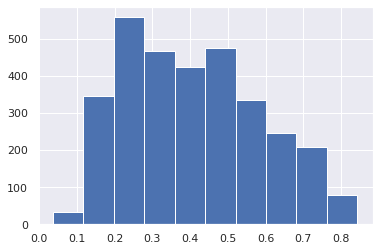

In [ ]:
data_voces['sfm'].hist();

La variable sfm tiene datos dispersos de manera bastante uniforme. Muestra mas un comportamiento asimetrico positivo, teniendo gran cantidad de datos desde 0.1 a 0.5

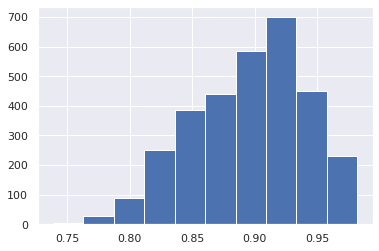

In [ ]:
data_voces['sp.ent'].hist();

Los datos de sp.ent muestran una distribución negativa asimetrica, contando con la mayoría de datos en la parte final de la gráfica. Gran parte de datos se encuentra entre 0.87 y 0.93, teniendo una alza de los datos bastante constante pero lento en la primera parte del a gráfica.

In [ ]:
#Utilización de tablas pivote para relacionar datos con los generos. A continuación las hipotesis:

#De hecho, dado que el valor de meandom es positivo, esto apoya nuestra hipótesis de que un aumento en la frecuencia se corresponde con una clasificación de la voz de la mujer.
#A primera vista, un algoritmo simple de establecer un umbral para la frecuencia suena como una forma razonable de detectar el género a partir de la voz o el habla.

In [ ]:
data_voces.pivot_table(index= ['genero'], values = ['meanfreq'], aggfunc='mean')

,meanfreq
genero,
Femenino,0.191000
Masculino,0.170813


In [ ]:
data_voces.pivot_table(index= ['genero'], values = ['sd'], aggfunc='mean')

,sd
genero,
Femenino,0.049142
Masculino,0.065089


In [ ]:
data_voces.pivot_table(index= ['genero'], values = ['meanfun'], aggfunc='mean')

,meanfun
genero,
Femenino,0.169742
Masculino,0.115798


In [ ]:
data_voces.pivot_table(index= ['genero'], values = ['meandom'], aggfunc='mean')

,meandom
genero,
Femenino,2.593021e+14
Masculino,3.163847e+14


In [ ]:
#El modelo de línea base basado en frecuencias da como resultado una precisión del 61% en el conjunto de entrenamiento y del 59% en el conjunto de pruebas. 
Esto es mejor que el primer algoritmo de línea de base, pero todavía está lejos de la detección precisa de voces masculinas / femeninas.

SyntaxError: ignored

In [ ]:
data_voces.pivot_table(index= ['genero'], values = ['modindx'], aggfunc='mean')

,modindx
genero,
Femenino,0.170073
Masculino,0.177430


In [ ]:
data_voces.pivot_table(index= ['genero'], values = ['mindom'], aggfunc='mean')

,mindom
genero,
Femenino,0.064987
Masculino,0.040307


In [ ]:
data_voces.pivot_table(index= ['genero'], values = ['maxfun'], aggfunc='mean')

,maxfun
genero,
Femenino,0.263848
Masculino,0.253093


In [ ]:
data_voces.pivot_table(index= ['genero'], values = ['dfrange'], aggfunc='mean')

,dfrange
genero,
Femenino,3592.969170
Masculino,84.221123


In [ ]:
data_voces.pivot_table(index= ['genero'], values = ['maxdom'], aggfunc='mean')

,maxdom
genero,
Femenino,2852.581320
Masculino,82.417479


In [ ]:
data_voces.pivot_table(index= ['genero'], values = ['minfun'], aggfunc='mean')

,minfun
genero,
Femenino,0.039429
Masculino,0.034054


In [ ]:
data_voces.pivot_table(index= ['genero'], values = ['centroid'], aggfunc='mean')

,centroid
genero,
Femenino,0.191000
Masculino,0.170734


In [ ]:
data_voces.pivot_table(index= ['genero'], values = ['mode'], aggfunc='mean')

,mode
genero,
Femenino,0.178541
Masculino,0.151985


In [ ]:
data_voces.pivot_table(index= ['genero'], values = ['sfm'], aggfunc='mean')

,sfm
genero,
Femenino,0.344763
Masculino,0.471670


In [ ]:
data_voces.pivot_table(index= ['genero'], values = ['sp.ent'], aggfunc='mean')

,sp.ent
genero,
Femenino,0.873066
Masculino,0.917145


In [ ]:
data_voces.pivot_table(index= ['genero'], values = ['kurt'], aggfunc='mean')

,kurt
genero,
Femenino,419.067321
Masculino,435.443034


In [ ]:
data_voces.pivot_table(index= ['genero'], values = ['skew'], aggfunc='mean')

,skew
genero,
Femenino,24.923355
Masculino,22.229829


In [ ]:
data_voces.pivot_table(index= ['genero'], values = ['IQR'], aggfunc='mean')

,IQR
genero,
Femenino,0.057834
Masculino,0.110768


In [ ]:
data_voces.pivot_table(index= ['genero'], values = ['Q25'], aggfunc='mean')

,Q25
genero,
Femenino,0.165349
Masculino,0.115562


In [ ]:
data_voces.pivot_table(index= ['genero'], values = ['Q75'], aggfunc='mean')

,Q75
genero,
Femenino,0.223184
Masculino,0.226388


In [ ]:
data_voces.pivot_table(index= ['genero'], values = ['median'], aggfunc='mean')

,median
genero,
Femenino,0.195942
Masculino,0.175299


In [ ]:
#Obtener desviaciones estandares de los datos para visualizar relaciones

In [ ]:
data_voces.pivot_table(index= ['genero'], values = ['median'], aggfunc='std')

,median
genero,
Femenino,0.032149
Masculino,0.037392


In [ ]:
data_voces.pivot_table(index= ['genero'], values = ['meanfreq'], aggfunc='std')

,meanfreq
genero,
Femenino,0.029960
Masculino,0.026254


In [ ]:
data_voces.pivot_table(index= ['genero'], values = ['sd'], aggfunc='std')

,sd
genero,
Femenino,0.018380
Masculino,0.009453


In [ ]:
data_voces.pivot_table(index= ['genero'], values = ['Q25'], aggfunc='std')

,Q25
genero,
Femenino,0.049767
Masculino,0.031999


In [ ]:
data_voces.pivot_table(index= ['genero'], values = ['Q75'], aggfunc='std')

,Q75
genero,
Femenino,0.023121
Masculino,0.024018


In [ ]:
data_voces.pivot_table(index= ['genero'], values = ['IQR'], aggfunc='std')

,IQR
genero,
Femenino,0.042924
Masculino,0.020418


In [ ]:
data_voces.pivot_table(index= ['genero'], values = ['skew'], aggfunc='std')

,skew
genero,
Femenino,14.762433
Masculino,17.547225


In [ ]:
data_voces.pivot_table(index= ['genero'], values = ['kurt'], aggfunc='std')

,kurt
genero,
Femenino,305.969621
Masculino,262.799738


In [ ]:
data_voces.pivot_table(index= ['genero'], values = ['sp.ent'], aggfunc='std')

,sp.ent
genero,
Femenino,0.047288
Masculino,0.028919


In [ ]:
data_voces.pivot_table(index= ['genero'], values = ['sfm'], aggfunc='std')

,sfm
genero,
Femenino,0.179854
Masculino,0.150473


In [ ]:
data_voces.pivot_table(index= ['genero'], values = ['mode'], aggfunc='std')

,mode
genero,
Femenino,0.067175
Masculino,0.084025


In [ ]:
data_voces.pivot_table(index= ['genero'], values = ['centroid'], aggfunc='std')

,centroid
genero,
Femenino,0.029960
Masculino,0.026579


In [ ]:
data_voces.pivot_table(index= ['genero'], values = ['meanfun'], aggfunc='std')

,meanfun
genero,
Femenino,0.018460
Masculino,0.017424


In [ ]:
data_voces.pivot_table(index= ['genero'], values = ['minfun'], aggfunc='std')

,minfun
genero,
Femenino,0.021845
Masculino,0.015942


In [ ]:
data_voces.pivot_table(index= ['genero'], values = ['maxfun'], aggfunc='std')

,maxfun
genero,
Femenino,0.021529
Masculino,0.038683


In [ ]:
data_voces.pivot_table(index= ['genero'], values = ['meandom'], aggfunc='std')

,meandom
genero,
Femenino,2.779165e+14
Masculino,3.178939e+14


In [ ]:
data_voces.pivot_table(index= ['genero'], values = ['mindom'], aggfunc='std')

,mindom
genero,
Femenino,0.072739
Masculino,0.049199


In [ ]:
data_voces.pivot_table(index= ['genero'], values = ['maxdom'], aggfunc='std')

,maxdom
genero,
Femenino,44864.352815
Masculino,434.254020


In [ ]:
data_voces.pivot_table(index= ['genero'], values = ['dfrange'], aggfunc='std')

,dfrange
genero,
Femenino,66819.584518
Masculino,449.736784


In [ ]:
#Analisis de data por medio de tablas pivote y sus respectivas gráficas

**Moda vrs meanfreq**

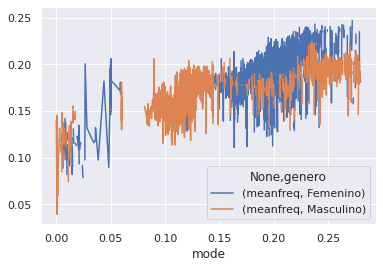

In [ ]:
data_voces.pivot_table(values= ['meanfreq'], index= ['mode'], columns = ['genero'], aggfunc ='mean').plot();

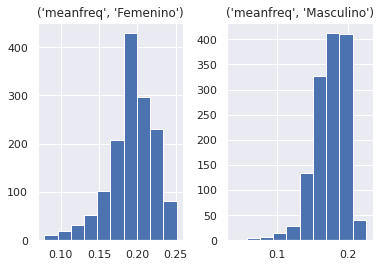

In [ ]:
data_voces.pivot_table(values= ['meanfreq'], index= ['mode'], columns = ['genero'], aggfunc ='mean').hist();

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


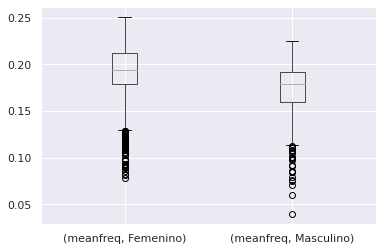

In [ ]:
data_voces.pivot_table(values= ['meanfreq'], index= ['mode'], columns = ['genero'], aggfunc ='mean').boxplot();

Moda vrs meanfreq: 
Se observa un comportamiento de correlación entre estas dos variables. La moda aumenta junto con la meanfreq, o bien, entre mas alta es la moda tiende a ser mas alta el promedio de frecuencia (KHZ). El comportamiento es muy similar en las mujeres y hombres, unicamente cambia la segmentación de los datos. En el histograma especifico podemos ver un comportamiento normal para ambos generos aunque en las mujeres es mas pronunciado y se concentra en menos datos. En los boxplot podemos observar de una manera mucho mas sencilla que las mujeres llega a meanfreq mucho mas altos y los hombres cuentan con frecuencias mas bajas.

**Meanfreq VRS sd**

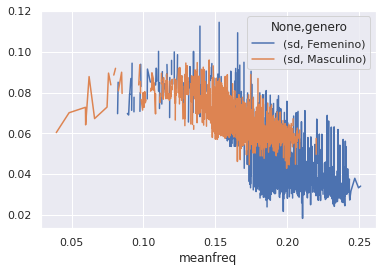

In [ ]:
data_voces.pivot_table(values= ['sd'], index= ['meanfreq'], columns = ['genero'], aggfunc ='mean').plot();

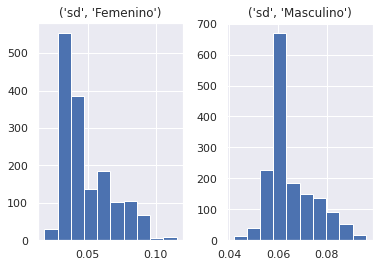

In [ ]:
data_voces.pivot_table(values= ['sd'], index= ['meanfreq'], columns = ['genero'], aggfunc ='mean').hist();

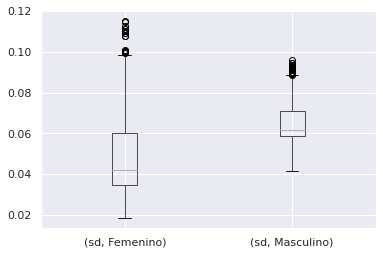

In [ ]:
data_voces.pivot_table(values= ['sd'], index= ['meanfreq'], columns = ['genero'], aggfunc ='mean').boxplot();

Meanfreq VRS sd: la desviación estandar tiende a disminuir cuando el promedio de frecuencia aumenta. Podemos confirmar que los datos tienden a estabilizarse cuanto mas altos son (meanfreq), ademas de tener muchos mas datos entre 0.15 y 0.22 aproximadamente como quedo claro en los anteriores histogramas. La tendencia entre hombre y mujeres con estas dos variables se mantienen. En los histogramas observamos comportamiento asimetrico positivo para las mujeres mientras que para los hombres tiende a buscar la normal. Tenemos muchos menos datos con numeros dispersos, aunque esto pasa mas con las mujeres ya que tenemos sd de hasta 0.09 (boxplot).

**Meanfun VRS sd**

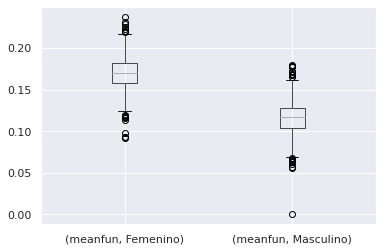

In [ ]:
data_voces.pivot_table(values= ['meanfun'], index= ['meanfreq'], columns = ['genero'], aggfunc ='mean').boxplot();

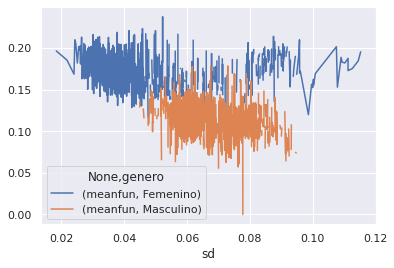

In [ ]:
data_voces.pivot_table(values= ['meanfun'], index= ['sd'], columns = ['genero'], aggfunc ='mean').plot();

Meanfun VRS sd: la desviación estandar tiende a disminuir cuando el promedio de frecuencia fundamental aumenta, de manera parecida a la relación con meanfreq pero de una manera menos pronunciada. Podemos confirmar que los datos tienden a estabilizarse cuanto mas altos son (meanfun). Este gráfico muestra la importancia mencionada de esta variable (meanfun), las variables de hombres y mujeres estan en su gran mayoría separadas y se relacionan traslapan de manera casi inexistente. Estos ultimos datos mencionandos podemos inclusive llegarlos a tomar como datos outliers.

**SP.ENT VRS meanfun**

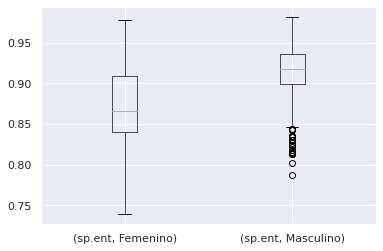

In [ ]:
data_voces.pivot_table(values= ['sp.ent'], index= ['meanfun'], columns = ['genero'], aggfunc ='mean').boxplot();

Este tipo de tablas ya se realizan con un trasfondo de analisis para fundamentar un modelo CART. Podemos observar que la variable sp.ent, tiene una cantidad de datos importantes que solo las mujeres pueden llegar a tener, siendo un 51.67 % probable el analizar e identificar a un genero con esta información.

**IQR VRS meanfun**

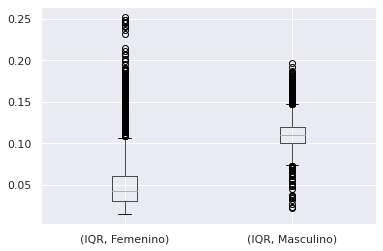

In [ ]:
data_voces.pivot_table(values= ['IQR'], index= ['meanfun'], columns = ['genero'], aggfunc ='mean').boxplot();

Este tipo de tablas ya se realizan con un trasfondo de analisis para fundamentar un modelo CART. Podemos observar que la variable IQR, tiene una cantidad de datos importantes que solo las mujeres y hombres pueden llegar a tener, siendo un 65.52 % probable el analizar e identificar a un genero con esta información.

**modindx VRS meanfun**

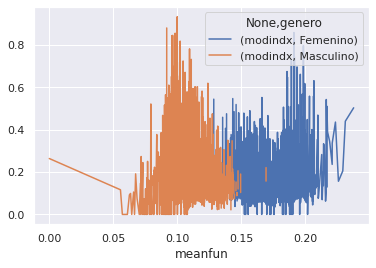

In [ ]:
data_voces.pivot_table(values= ['modindx'], index= ['meanfun'], columns = ['genero'], aggfunc ='mean').plot();

El indice de modulación es constante a lo largo de todo el promedio fundamental, ya sea este último de gran o de poco valor. Se puede observar que el promedio en los dos generos es muy parecido y su desviación estandar difiere en poco para tomarla como un valor a destacar. Posteriormente con el analisis se determinara si las conclusiones graficas son ciertas.

In [ ]:
import scipy.stats as stats

In [ ]:
obj_df = data_voces.select_dtypes(include=['object']).copy()

In [ ]:
print(obj_df.columns)


Index(['genero'], dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
lb_encoder = LabelEncoder()

In [ ]:
for col in obj_df.columns:
  data_voces[col] = lb_encoder.fit_transform(data_voces[col])

In [ ]:
data_voces.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
genero        int64
dtype: object

In [ ]:
data_voces.head(4)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,genero
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,7.812500e+04,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,9.014423e+14,0.007812,0.054688,0.004687,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1.024928,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,7.990057e+14,0.007812,0.001563,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,12.328313,417.729621,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,2.014974e+14,0.007812,0.000562,0.554688,0.247119,1


In [ ]:
print("Influencia del genero en el promedio medio") 
print(stats.f_oneway(data_voces[data_voces["genero"]==0]["meanfreq"], data_voces[data_voces["genero"]==1]["meanfreq"]))
print()
print("Influencia del genero en el sd") 
print(stats.f_oneway(data_voces[data_voces["genero"]==0]["sd"], data_voces[data_voces["genero"]==1]["sd"]))
print()
print("Influencia del genero en el median") 
print(stats.f_oneway(data_voces[data_voces["genero"]==0]["median"], data_voces[data_voces["genero"]==1]["median"]))
print()
print("Influencia del genero en el Q25") 
print(stats.f_oneway(data_voces[data_voces["genero"]==0]["Q25"], data_voces[data_voces["genero"]==1]["Q25"]))
print()
print("Influencia del genero en el Q75") 
print(stats.f_oneway(data_voces[data_voces["genero"]==0]["Q75"], data_voces[data_voces["genero"]==1]["Q75"]))
print()
print("Influencia del genero en el skew") 
print(stats.f_oneway(data_voces[data_voces["genero"]==0]["skew"], data_voces[data_voces["genero"]==1]["skew"]))
print()
print("Influencia del genero en el IQR") 
print(stats.f_oneway(data_voces[data_voces["genero"]==0]["IQR"], data_voces[data_voces["genero"]==1]["IQR"]))
print()
print("Influencia del genero en el kurt") 
print(stats.f_oneway(data_voces[data_voces["genero"]==0]["kurt"], data_voces[data_voces["genero"]==1]["kurt"]))
print()
print("Influencia del genero en el sp.ent") 
print(stats.f_oneway(data_voces[data_voces["genero"]==0]["sp.ent"], data_voces[data_voces["genero"]==1]["sp.ent"]))
print()
print("Influencia del genero en el sfm") 
print(stats.f_oneway(data_voces[data_voces["genero"]==0]["sfm"], data_voces[data_voces["genero"]==1]["sfm"]))
print()
print("Influencia del genero en el mode") 
print(stats.f_oneway(data_voces[data_voces["genero"]==0]["mode"], data_voces[data_voces["genero"]==1]["mode"]))
print()
print("Influencia del genero en el centroid") 
print(stats.f_oneway(data_voces[data_voces["genero"]==0]["centroid"], data_voces[data_voces["genero"]==1]["centroid"]))
print()
print("Influencia del genero en el meanfun") 
print(stats.f_oneway(data_voces[data_voces["genero"]==0]["meanfun"], data_voces[data_voces["genero"]==1]["meanfun"]))
print()
print("Influencia del genero en el minfun") 
print(stats.f_oneway(data_voces[data_voces["genero"]==0]["minfun"], data_voces[data_voces["genero"]==1]["minfun"]))
print()
print("Influencia del genero en el maxfun") 
print(stats.f_oneway(data_voces[data_voces["genero"]==0]["maxfun"], data_voces[data_voces["genero"]==1]["maxfun"]))
print()
print("Influencia del genero en el meandom") 
print(stats.f_oneway(data_voces[data_voces["genero"]==0]["meandom"], data_voces[data_voces["genero"]==1]["meandom"]))
print()
print("Influencia del genero en el mindom") 
print(stats.f_oneway(data_voces[data_voces["genero"]==0]["mindom"], data_voces[data_voces["genero"]==1]["mindom"]))
print()
print("Influencia del genero en el dfrange") 
print(stats.f_oneway(data_voces[data_voces["genero"]==0]["dfrange"], data_voces[data_voces["genero"]==1]["dfrange"]))
print()
print("Influencia del genero en el modindx") 
print(stats.f_oneway(data_voces[data_voces["genero"]==0]["modindx"], data_voces[data_voces["genero"]==1]["modindx"]))
print()
print("Influencia del genero en el maxdom") 
print(stats.f_oneway(data_voces[data_voces["genero"]==0]["modindx"], data_voces[data_voces["genero"]==1]["modindx"]))
print()


Influencia del genero en el promedio medio
F_onewayResult(statistic=406.7528201796772, pvalue=3.3689508532975636e-85)

Influencia del genero en el sd
F_onewayResult(statistic=943.0147964164684, pvalue=1.709168959227198e-181)

Influencia del genero en el median
F_onewayResult(statistic=277.5881581186491, pvalue=8.259209564382092e-60)

Influencia del genero en el Q25
F_onewayResult(statistic=1121.5692236486623, pvalue=9.14083242729649e-211)

Influencia del genero en el Q75
F_onewayResult(statistic=14.637981853325103, pvalue=0.0001327777034234291)

Influencia del genero en el skew
F_onewayResult(statistic=21.854874991436514, pvalue=3.063530981133606e-06)

Influencia del genero en el IQR
F_onewayResult(statistic=1964.4648294472513, pvalue=0.0)

Influencia del genero en el kurt
F_onewayResult(statistic=2.611069687382366, pvalue=0.10621979414700983)

Influencia del genero en el sp.ent
F_onewayResult(statistic=1001.6779980238745, pvalue=3.000002000610488e-191)

Influencia del genero en el sfm

Luego de realizar el ANOVA completo del dataset se puede concluir que la mayoría de datos tienen una relación directa con el genero de la persona. Tomando en cuenta que si el pvalue<0.05 se rechaza HOHO.Esto nos ayuda a tomarle la importancia a cada uno de ellos, sin embargo no nos otorga mayor idea si queremos ser mas especificos. En el caso de las variables "modindx", "maxdom" y el "kurt" no encontramos correlación con el genero (pvalue>0.05). La anterior información verifica y comprueba los datos obtenidos en el analisis plasmado en el excel, este ultimo nos brinda una mejor idea cuantitativa de cada variable.

### Machine Learning

In [ ]:
data_voces.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,genero
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,7.812500e+04,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,9.014423e+14,0.007812,0.054688,0.004687,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1.024928,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,7.990057e+14,0.007812,0.001563,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,12.328313,417.729621,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,2.014974e+14,0.007812,0.000562,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,11.011737,43.337132,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,7.128125e+06,0.007812,0.548438,5.476562,0.208274,1


In [ ]:
# Matriz de correlación de variables para clusters ML
correlacion = data_voces.corr()

In [ ]:
correlacion

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,genero
meanfreq,1.000000,-0.738795,0.925445,0.911416,0.739508,-0.627484,-0.104350,0.049512,-0.600948,-0.784332,0.686596,0.997207,0.459646,0.384053,0.268133,-0.071127,0.229261,0.044125,0.035108,-0.216979,-0.337415
sd,-0.738795,1.000000,-0.562483,-0.846667,-0.159875,0.874513,0.014933,0.033889,0.716281,0.837445,-0.528131,-0.736474,-0.465742,-0.344062,-0.133706,0.032701,-0.357334,-0.050628,-0.045045,0.122613,0.479061
median,0.925445,-0.562483,1.000000,0.774922,0.730408,-0.477237,-0.108834,0.082509,-0.501770,-0.661690,0.676109,0.923420,0.413084,0.338339,0.248340,-0.060523,0.191169,0.028702,0.023929,-0.213298,-0.283919
Q25,0.911416,-0.846667,0.774922,1.000000,0.475668,-0.874107,-0.006115,-0.026565,-0.647929,-0.766875,0.590760,0.908767,0.543850,0.320970,0.199115,-0.066944,0.302255,0.039823,0.033409,-0.141377,-0.511455
Q75,0.739508,-0.159875,0.730408,0.475668,1.000000,0.011035,-0.191654,0.120832,-0.173831,-0.377163,0.484356,0.738137,0.152784,0.257628,0.269770,-0.066940,-0.024397,0.025810,0.013163,-0.216290,0.067840
IQR,-0.627484,0.874513,-0.477237,-0.874107,0.011035,1.000000,-0.098844,0.097317,0.640717,0.663331,-0.403763,-0.625234,-0.533763,-0.222380,-0.077552,0.038623,-0.356940,-0.031031,-0.030721,0.041183,0.618791
skew,-0.104350,0.014933,-0.108834,-0.006115,-0.191654,-0.098844,1.000000,-0.196678,-0.060112,0.031387,-0.126798,-0.104996,0.022124,-0.071299,-0.110050,-0.016064,0.059618,-0.013735,-0.001991,0.090657,-0.082799
kurt,0.049512,0.033889,0.082509,-0.026565,0.120832,0.097317,-0.196678,1.000000,0.042145,-0.002359,0.101983,0.049434,-0.000019,0.015912,0.082567,-0.004836,-0.075437,-0.001455,-0.004419,-0.167801,0.028706
sp.ent,-0.600948,0.716281,-0.501770,-0.647929,-0.173831,0.640717,-0.060112,0.042145,1.000000,0.865854,-0.324754,-0.599780,-0.512187,-0.307020,-0.127355,0.105394,-0.294634,-0.004313,-0.009503,0.197954,0.490249
sfm,-0.784332,0.837445,-0.661690,-0.766875,-0.377163,0.663331,0.031387,-0.002359,0.865854,1.000000,-0.484549,-0.782727,-0.421219,-0.360893,-0.194805,0.063879,-0.289593,-0.055191,-0.048845,0.211477,0.357499


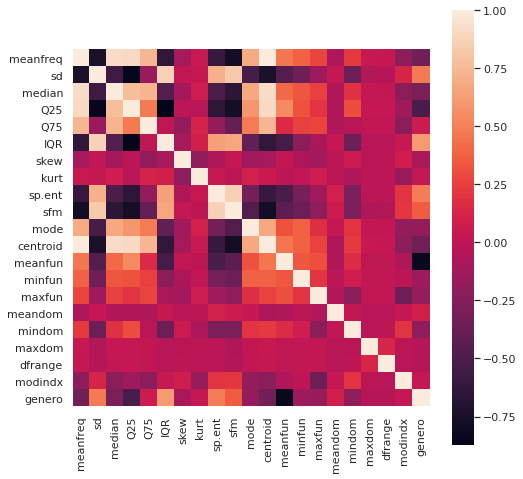

In [ ]:
# Visualizacion de correlacion
f, ax = plt.subplots(figsize = (8,8))
sns.heatmap(correlacion, square = True)
plt.show()

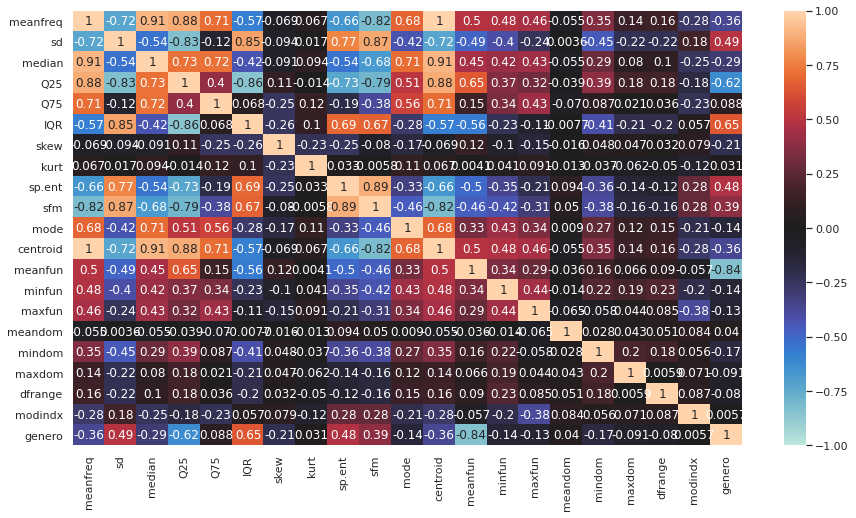

In [ ]:
# Correlacion con valores 'spearman'
f,ax = plt.subplots(figsize = (15,8))
sns.heatmap(data_voces.corr(method = 'spearman'),annot=True,vmin=-1, vmax=1, center= 0)
plt.show()

Tomando en cuenta las variables analizadas en el punto D y con base la matriz de correlacion, se determino utilizar las variables meanfreq e IQR para realizar la clusterizacion de este modelo no supervisado, debido a la baja correlacion entre ambas columnas.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


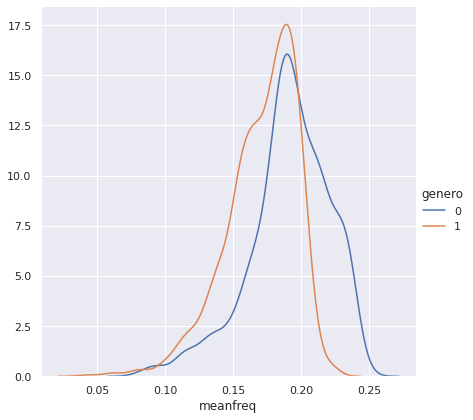

In [ ]:
# Distribucion meanfreq por genero
sns.FacetGrid(data_voces, hue="genero", size=6).map(sns.kdeplot, "meanfreq").add_legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


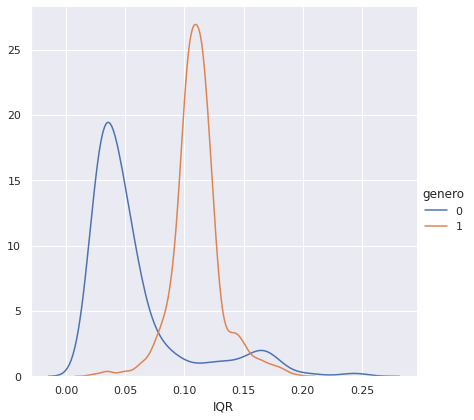

In [ ]:
# Distribucion IQR por genero
sns.FacetGrid(data_voces, hue="genero", size=6).map(sns.kdeplot, "IQR").add_legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


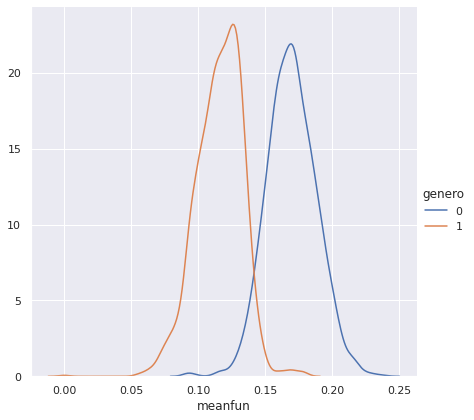

In [ ]:
# Distribucion meanfreq por genero
sns.FacetGrid(data_voces, hue="genero", size=6).map(sns.kdeplot, "meanfun").add_legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


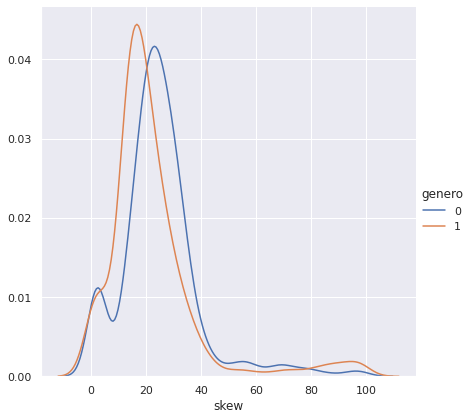

In [ ]:
# Distribucion skew por genero
sns.FacetGrid(data_voces, hue="genero", size=6).map(sns.kdeplot, "skew").add_legend()
plt.show()

In [ ]:
# Extrayendo variables a utilizar, solamente 'meanfreq' y 'IQR'
datos1 = data_voces.iloc[:, [0,5]].values

In [ ]:
datos1

array([[0.05978098, 0.07512195],
       [0.06600874, 0.07325232],
       [0.0773155 , 0.12320696],
       ...,
       [0.14205626, 0.19093638],
       [0.14365874, 0.1764347 ],
       [0.16550895, 0.18075587]])

In [ ]:
# Reasignando variable para K-means
X = datos1

In [ ]:
# K-means con el codo de Jambu

from sklearn.cluster import KMeans

def elbow_method(epsilon, figure = False):
  wcss = []

  diff = np.inf
  i = 1

  while diff > epsilon:
    print("Iteracion N Clusters: k: {k}".format(k=i))

    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)

    if diff == np.inf:
      diff = kmeans.inertia_

    elif kmeans.inertia_ == 0:
      wcss.append(kmeans.inertia_)
      break

    else: 
      diff = (wcss[-1] - kmeans.inertia_) / wcss[-1]
    wcss.append(kmeans.inertia_)
    i += 1

  if figure: 
    plt.plot(range(0, len(wcss)), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Numero idoneo de clusters')
    plt.ylabel('WCSS')
    plt.show()

    k = i - 1
    return wcss, k

Iteracion N Clusters: k: 1
Iteracion N Clusters: k: 2
Iteracion N Clusters: k: 3
Iteracion N Clusters: k: 4
Iteracion N Clusters: k: 5
Iteracion N Clusters: k: 6
Iteracion N Clusters: k: 7
Iteracion N Clusters: k: 8
Iteracion N Clusters: k: 9
Iteracion N Clusters: k: 10
Iteracion N Clusters: k: 11
Iteracion N Clusters: k: 12
Iteracion N Clusters: k: 13
Iteracion N Clusters: k: 14
Iteracion N Clusters: k: 15
Iteracion N Clusters: k: 16
Iteracion N Clusters: k: 17
Iteracion N Clusters: k: 18
Iteracion N Clusters: k: 19
Iteracion N Clusters: k: 20
Iteracion N Clusters: k: 21


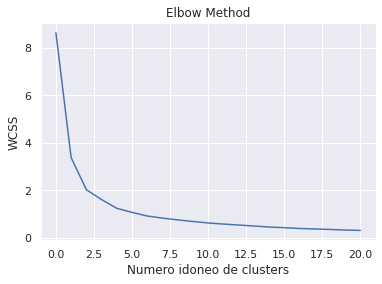

In [ ]:
# Visualizacion de resultados

epsilon = 0.05
wcss, _ = elbow_method(epsilon, figure = True)

Utilizando el metodo de clusterizacion del codo de Jambu, se han obtenido 21 posibles cluster para estas variables.

Iteracion N Clusters: k: 1
Iteracion N Clusters: k: 2
Iteracion N Clusters: k: 3
Iteracion N Clusters: k: 4


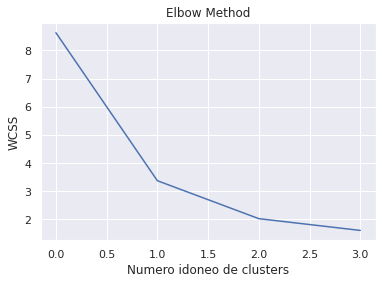

In [ ]:
# k optima para cantidad de clusters a visualizar

epsilon = 0.30
_, k = elbow_method(epsilon, figure= True)

Se obtiene una k optima de 4 clusters para este analisis.

In [ ]:
# k-means 
kmeans = KMeans(n_clusters = k, init= 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X) 

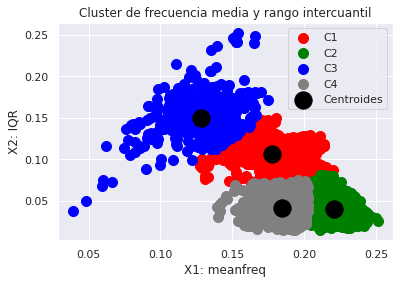

In [ ]:
# Visualizacion de plot de K-means

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'C1') 
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'green', label = 'C2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'blue', label = 'C3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'grey', label = 'C4')

plt.title('Cluster de frecuencia media y rango intercuantil')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 300, c = 'black', label = 'Centroides')
plt.xlabel('X1: meanfreq')
plt.ylabel('X2: IQR')
plt.legend()
plt.show()

In [ ]:
import scipy.cluster.hierarchy as sch

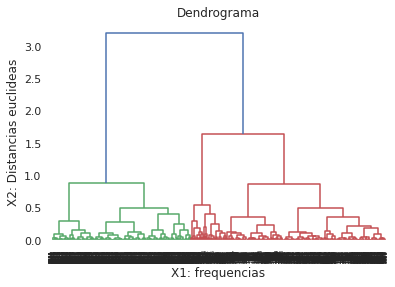

In [ ]:
# Metodo ward

dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward')) 
plt.title('Dendrograma')
plt.xlabel('X1: frequencias')
plt.ylabel('X2: Distancias euclideas')
plt.show()


In [ ]:
# Espacio bidimensional de 4 clusters
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

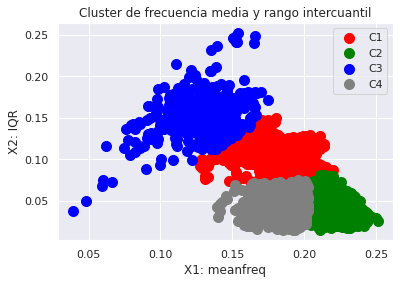

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'C1') 
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'green', label = 'C2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'blue', label = 'C3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'grey', label = 'C4')

plt.title('Cluster de frecuencia media y rango intercuantil')
plt.xlabel('X1: meanfreq')
plt.ylabel('X2: IQR')
plt.legend()
plt.show()

Como se puede apreciar en los resultados se han creado 4 cluster los cuales son los optimos de relación para este dataset y variables. Se puede obsercar como cada uno de los clusters se encuentra separado. 

El primer cluster de color rojo muestra los datos entre meanfreq con puntajes desde 0.12 hasta 0.22 y para IQR se encuentra desde 0.08 hasta 0.16, esto quiere decir que para este cluster los datos mantienen una frecuencia media muy similar con el rango intercuantil.

El segundo cluster de color verde muestra los datos entre meanfreq con puntajes desde 0.21 hasta 0.25 y para IQR se encuentra desde 0.01 hasta 0.08, esto quiere decir que para este cluster los datos mantienen una frecuencia media mayor al rango intercuantil.

El tercer cluster de color azul muestra los datos entre meanfreq con puntajes desde 0.02 hasta 0.17 y para IQR se encuentra desde 0.04 hasta 0.26, esto quiere decir que para este cluster los datos tienen un IQR mayor que la frecuencia media. 

Por ultimo el cuarto cluster de color gris muestra los datos entre meanfreq con puntajes desde 0.12 hasta 0.22 y para IQR se encuentra desde 0.01 hasta 0.07, esto quiere decir que para este cluster los datos tienen una mayor frecuencia media que el rango intercuantil.

Con esto anterior se puede determinar que los datos son coherentes con analisis anteriores, debido a que estas dos variables no tienen correlación entre si por lo que sus resultados pueden llegar a ser diferentes, sin embargo se puede observar que cada cluster se encuentra por separado lo cual refleja una diferenciacion entre los datos.